## 資料處理(補值、型態)

In [1]:
#以下讀新的黨
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

alldf = pd.read_csv('new_statcast_standard_salary.csv')
alldf

,Name,draft_year,signing_bonus,contract start year,tenure,wage,signed age,contract length,start or relief,Season,...,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%,ERA_y,xERA
0,A.J. Achter,2010,0,2016,3,507500,27,1,Relief Pitcher,2015,...,0.279,0.595,0.335,0.402,0.519,34.2,24.1,10.3,6.75,7.25
1,A.J. Cole,2010,2000000,2016,2,507500,23,1,Relief Pitcher,2015,...,0.289,0.413,0.340,0.318,0.404,47.1,20.5,2.3,5.79,4.19
2,A.J. Cole,2010,2000000,2017,3,535000,24,1,Relief Pitcher,2016,...,0.187,0.366,0.328,0.273,0.313,26.5,23.2,8.3,5.17,3.09
3,A.J. Cole,2010,2000000,2018,4,555300,26,1,Relief Pitcher,2017,...,0.260,0.434,0.348,0.347,0.377,34.2,19.1,12.2,3.81,5.30
4,A.J. Cole,2010,2000000,2019,5,555000,26,1,Relief Pitcher,2018,...,0.243,0.448,0.389,0.333,0.423,36.2,26.7,10.0,6.14,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,Zack Greinke,2002,2475000,2022,19,13000000,38,1,Starting pitcher,2021,...,0.266,0.430,0.309,0.320,0.365,35.4,17.2,5.2,4.16,4.35
1880,Zack Greinke,2002,2475000,2023,20,8500000,39,1,Starting pitcher,2022,...,0.284,0.441,0.321,0.336,0.365,39.6,12.5,4.6,3.68,4.78
1881,Zack Wheeler,2009,3300000,2018,6,1900000,27,1,Starting pitcher,2017,...,0.259,0.439,0.355,0.338,0.385,35.9,21.0,10.4,5.21,4.99
1882,Zack Wheeler,2009,3300000,2019,7,5975000,28,1,Starting pitcher,2018,...,0.219,0.334,0.272,0.278,0.326,27.1,24.1,7.4,3.31,3.23


In [2]:

alldf = alldf.drop(columns = ['start or relief','draft_year','contract start year' ,'contract length','Season','Tm','LG','Age','wage','ERA_y'])


In [3]:
alldf['Barrel %'] = alldf['Barrel %'].replace('--', float('nan'))
alldf['Barrel %'] = alldf['Barrel %'].astype(float)
alldf['Barrel %']

0       18.4
1        5.9
2        9.7
3        5.2
4       10.7
        ... 
1879     6.5
1880     6.8
1881     8.4
1882     4.8
1883     5.3
Name: Barrel %, Length: 1884, dtype: float64

In [4]:
alldf['Exit Velocity'] = alldf['Exit Velocity'].replace('--', float('nan'))
alldf['Exit Velocity'] = alldf['Exit Velocity'].astype(float)
alldf['Exit Velocity']

0       88.5
1       90.8
2       88.8
3       87.8
4       88.1
        ... 
1879    88.3
1880    88.9
1881    87.6
1882    86.1
1883    87.0
Name: Exit Velocity, Length: 1884, dtype: float64

In [5]:
column_names = ['Max EV', 'Launch Angle', 'Sweet Spot %', 'HardHit%']
alldf[column_names] = alldf[column_names].apply(pd.to_numeric, errors='coerce')
alldf

,Name,signing_bonus,tenure,signed age,adjusted wage,BF,W,L,ERA_x,G,...,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%,xERA
0,A.J. Achter,0,3,27,654675,58.0,0.0,1.0,6.75,11.0,...,42.1,0.279,0.595,0.335,0.402,0.519,34.2,24.1,10.3,7.25
1,A.J. Cole,2000000,2,23,654675,44.0,0.0,0.0,5.79,3.0,...,29.4,0.289,0.413,0.340,0.318,0.404,47.1,20.5,2.3,4.19
2,A.J. Cole,2000000,3,24,675789,168.0,1.0,2.0,5.17,8.0,...,28.3,0.187,0.366,0.328,0.273,0.313,26.5,23.2,8.3,3.09
3,A.J. Cole,2000000,4,26,684670,229.0,3.0,5.0,3.81,11.0,...,32.9,0.260,0.434,0.348,0.347,0.377,34.2,19.1,12.2,5.30
4,A.J. Cole,2000000,5,26,671990,221.0,4.0,2.0,6.14,32.0,...,41.4,0.243,0.448,0.389,0.333,0.423,36.2,26.7,10.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,Zack Greinke,2475000,19,38,13750597,697.0,11.0,6.0,4.16,30.0,...,35.3,0.266,0.430,0.309,0.320,0.365,35.4,17.2,5.2,4.35
1880,Zack Greinke,2475000,20,39,8500000,585.0,4.0,9.0,3.68,26.0,...,34.4,0.284,0.441,0.321,0.336,0.365,39.6,12.5,4.6,4.78
1881,Zack Wheeler,3300000,6,27,2342652,386.0,3.0,7.0,5.21,17.0,...,36.6,0.259,0.439,0.355,0.338,0.385,35.9,21.0,10.4,4.99
1882,Zack Wheeler,3300000,7,28,7234493,744.0,12.0,7.0,3.31,29.0,...,32.9,0.219,0.334,0.272,0.278,0.326,27.1,24.1,7.4,3.23


In [6]:
na_counts = alldf.isna().sum()
print(na_counts)

Name             0
signing_bonus    0
tenure           0
signed age       0
adjusted wage    0
BF               0
W                0
L                0
ERA_x            0
G                0
GS               0
SV               0
IP               0
H                0
R                0
ER               0
HR               0
BB               0
SO               0
WHIP             0
Pitches          0
Batted Balls     0
Barrels          0
Barrel %         1
Barrel/PA        0
Exit Velocity    1
Max EV           1
Launch Angle     1
Sweet Spot %     1
XBA              0
XSLG             0
WOBA             0
XWOBA            0
XWOBACON         0
HardHit%         1
K%               0
BB%              0
xERA             0
dtype: int64


In [7]:
columnslists  = ['Max EV','Launch Angle','Sweet Spot %','HardHit%',]
mean_value = alldf[column_names].mean()
mean_value
alldf[columnslists] = alldf[columnslists].fillna(mean_value)

mean_values = alldf['Barrel %'].mean()
alldf['Barrel %'] = alldf['Barrel %'] .fillna(mean_values)
mean_values

mean_values = alldf['Exit Velocity'].mean()
alldf['Exit Velocity'] = alldf['Exit Velocity'].fillna(mean_values)
mean_values

alldf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           1884 non-null   object 
 1   signing_bonus  1884 non-null   int64  
 2   tenure         1884 non-null   int64  
 3   signed age     1884 non-null   int64  
 4   adjusted wage  1884 non-null   int64  
 5   BF             1884 non-null   float64
 6   W              1884 non-null   float64
 7   L              1884 non-null   float64
 8   ERA_x          1884 non-null   float64
 9   G              1884 non-null   float64
 10  GS             1884 non-null   float64
 11  SV             1884 non-null   float64
 12  IP             1884 non-null   float64
 13  H              1884 non-null   float64
 14  R              1884 non-null   float64
 15  ER             1884 non-null   float64
 16  HR             1884 non-null   float64
 17  BB             1884 non-null   float64
 18  SO      

In [8]:
na_counts = alldf.isna().sum()
print(na_counts)

Name             0
signing_bonus    0
tenure           0
signed age       0
adjusted wage    0
BF               0
W                0
L                0
ERA_x            0
G                0
GS               0
SV               0
IP               0
H                0
R                0
ER               0
HR               0
BB               0
SO               0
WHIP             0
Pitches          0
Batted Balls     0
Barrels          0
Barrel %         0
Barrel/PA        0
Exit Velocity    0
Max EV           0
Launch Angle     0
Sweet Spot %     0
XBA              0
XSLG             0
WOBA             0
XWOBA            0
XWOBACON         0
HardHit%         0
K%               0
BB%              0
xERA             0
dtype: int64


In [9]:
alldf.to_csv('MLBfinaldata.csv')

## train_test_split

In [10]:
pd.set_option('display.max_columns', 40)
alldf.loc[alldf['Name'] == "Zack Wheeler"]

,Name,signing_bonus,tenure,signed age,adjusted wage,BF,W,L,ERA_x,G,GS,SV,IP,H,R,ER,HR,BB,SO,WHIP,Pitches,Batted Balls,Barrels,Barrel %,Barrel/PA,Exit Velocity,Max EV,Launch Angle,Sweet Spot %,XBA,XSLG,WOBA,XWOBA,XWOBACON,HardHit%,K%,BB%,xERA
1881,Zack Wheeler,3300000,6,27,2342652,386.0,3.0,7.0,5.21,17.0,17.0,0.0,86.1,97.0,53.0,50.0,15.0,40.0,81.0,1.59,1561,262,22,8.4,5.7,87.6,113.0,8.7,36.6,0.259,0.439,0.355,0.338,0.385,35.9,21.0,10.4,4.99
1882,Zack Wheeler,3300000,7,28,7234493,744.0,12.0,7.0,3.31,29.0,29.0,0.0,182.1,150.0,69.0,67.0,14.0,55.0,179.0,1.12,2884,501,24,4.8,3.2,86.1,112.9,11.3,32.9,0.219,0.334,0.272,0.278,0.326,27.1,24.1,7.4,3.23
1883,Zack Wheeler,3300000,8,29,28232457,828.0,11.0,8.0,3.96,31.0,31.0,0.0,195.1,196.0,93.0,86.0,22.0,50.0,195.0,1.26,3159,580,31,5.3,3.7,87.0,117.6,12.3,34.5,0.246,0.393,0.294,0.297,0.366,32.4,23.6,6.0,3.86


In [11]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, mutual_info_regression, f_regression

In [12]:

from sklearn.model_selection import train_test_split
X = alldf.drop(columns = ['adjusted wage', 'Name']) 
Y = alldf['adjusted wage']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state= 42)
print(f'訓練樣本的shape: {X_train.shape}')
print(f'測試樣本的shape: {X_test.shape}')

訓練樣本的shape: (1695, 36)
測試樣本的shape: (189, 36)


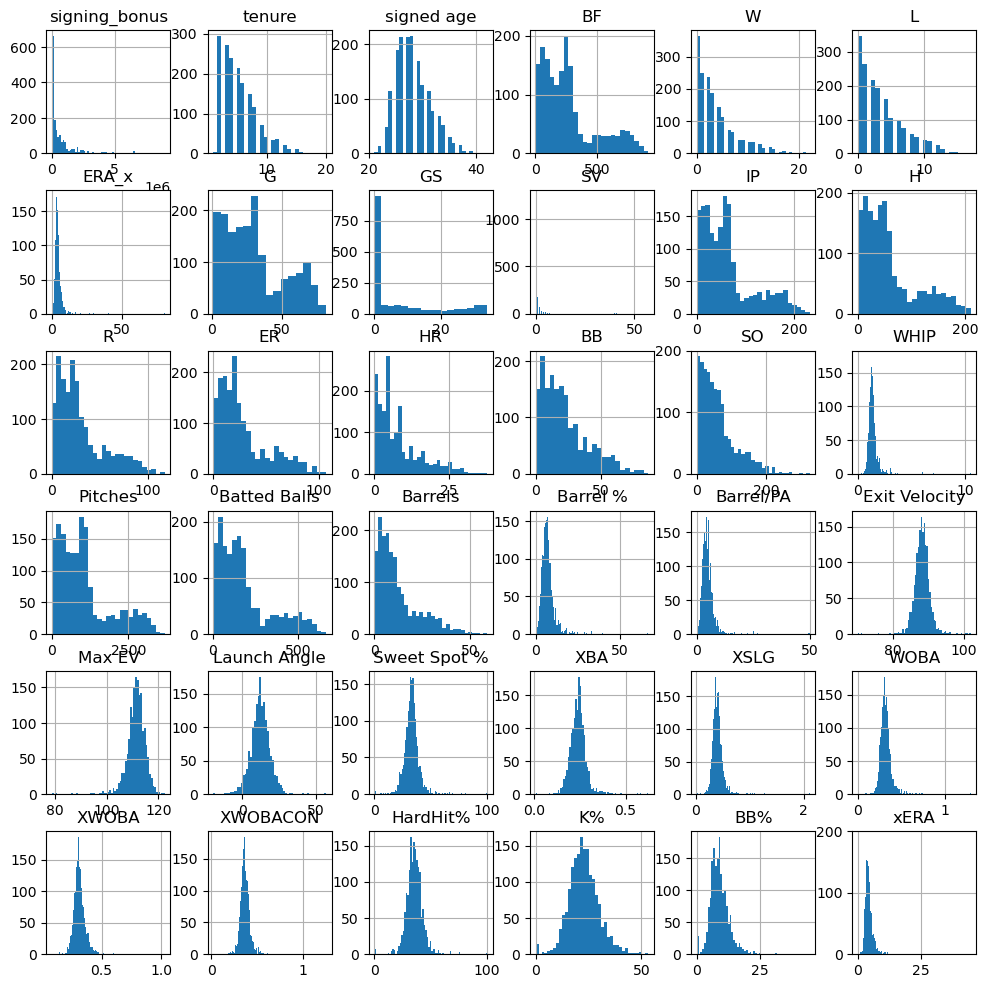

In [13]:
X_train.hist(figsize = [12,12], bins = 'auto')
import matplotlib.pyplot as plt
plt.show()

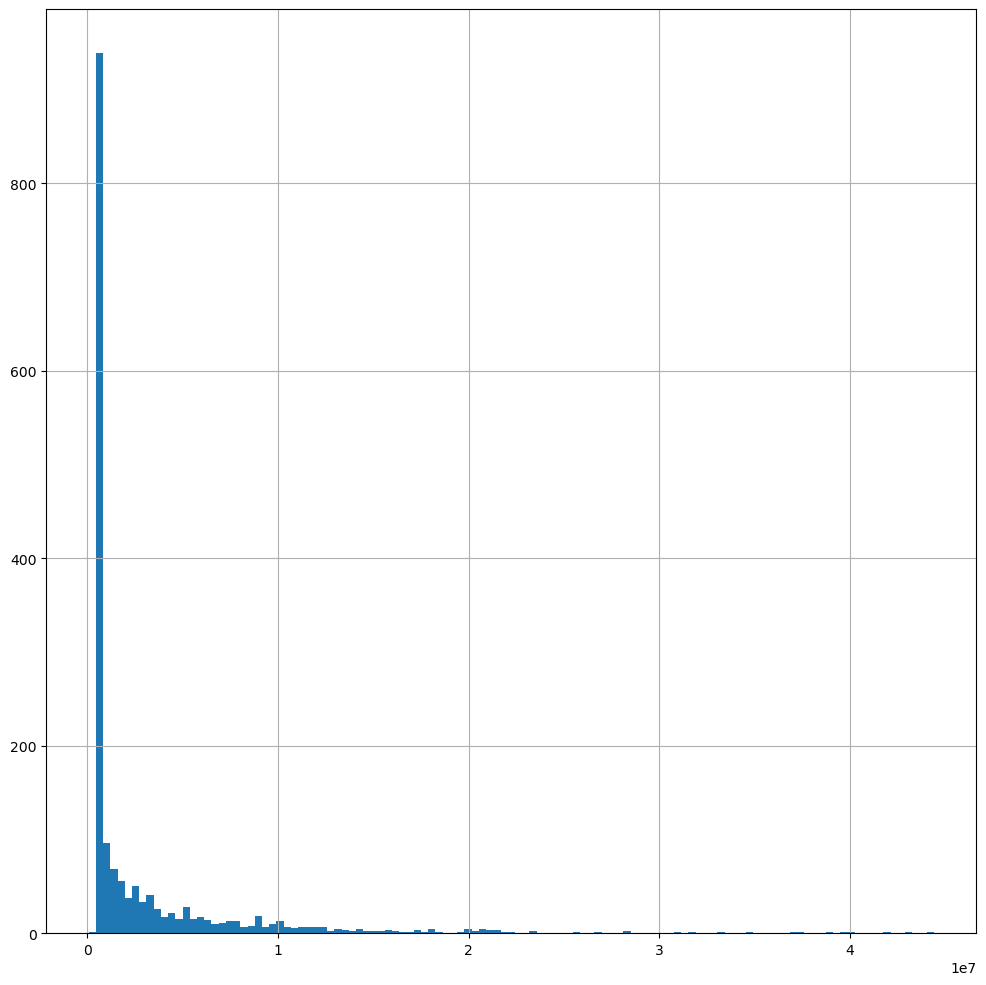

In [14]:
y_train.hist(figsize = [12,12], bins = 'auto')
plt.show()

## 前處理(標準化、對數)

In [15]:
#以上觀察完資料，開始標準化 
#preprocess 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

#標準化資料

num_cols = X_train.select_dtypes(['int', 'float']).columns
numeric_pipeline = Pipeline([('numnorm', StandardScaler()), # apply a standard scaler
                             ])
pitch_adv_ct = ColumnTransformer(transformers = [("numpipe", numeric_pipeline, num_cols)])

pitch_adv_ct

ColumnTransformer(transformers=[('numpipe',
                                 Pipeline(steps=[('numnorm',
                                                  StandardScaler())]),
                                 Index(['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA'],
      dtype='object'))])

In [16]:
#存起來

import pickle

pickle.dump(pitch_adv_ct, open('pkl.pitch_adv_ct.pkl', 'wb')) 
pitch_adv_ct  = pickle.load(open('pkl.pitch_adv_ct.pkl', 'rb'))

In [17]:
pp_X_train = pd.DataFrame(pitch_adv_ct.fit_transform(X_train))
pp_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-0.198365,0.881266,0.543831,1.939328,1.058353,2.247958,0.229147,-0.005434,2.104180,-0.308542,1.907366,2.014944,2.950263,3.009200,3.649030,1.442998,0.662689,-0.231838,1.840295,2.336098,2.104960,-0.119167,0.139722,-0.235200,0.309945,0.857559,0.326421,0.785124,0.841804,0.278596,0.659938,0.172209,-0.135133,-1.270995,-0.557437,0.422671
1,0.211657,-0.775874,-0.674667,-0.024377,-0.684514,-0.443346,-0.080390,1.703653,-0.690949,-0.308542,-0.008668,-0.062021,-0.022967,0.077409,-0.009353,0.164410,0.181472,-0.172873,-0.059378,-0.115063,-0.093268,-0.047353,-0.139804,0.123351,0.892720,0.482293,0.033593,-0.384066,-0.368790,-0.051187,-0.354619,-0.081461,0.082304,0.567380,0.125427,-0.336197
2,-0.526382,0.881266,0.848456,-0.224849,-0.684514,-0.144312,-0.425227,1.228907,-0.690949,1.370902,-0.194581,-0.221788,-0.300469,-0.432468,-0.551335,-0.416767,-0.261249,-0.408735,-0.222778,-0.166803,-0.368046,-0.430358,-0.349449,-0.414475,0.254443,-0.580962,0.282496,-0.226675,-0.551340,-0.682075,-0.778888,-0.715636,-0.416520,-0.148323,-0.557437,-0.607837
3,-0.608386,-0.444446,0.239207,-0.397983,-0.186552,-0.742380,0.174843,-1.002401,0.147589,-0.308542,-0.424125,-0.441467,-0.260826,-0.177529,-0.144848,-0.242414,-0.357492,-0.094252,-0.387354,-0.419033,0.181510,1.197413,1.083123,1.288640,0.781715,-0.627870,0.238572,-0.001831,0.793765,0.006167,0.659938,0.806385,0.939257,0.104278,0.226592,0.392489
4,0.139247,0.218410,-0.065418,-0.429876,-0.684514,0.154721,0.348618,-1.002401,0.147589,-0.308542,-0.481037,-0.141905,-0.181540,-0.135040,-0.009353,-0.707355,-0.684720,0.475748,-0.436727,-0.296152,-0.001675,0.455341,0.803597,0.974909,1.253485,-0.408964,-0.039614,1.302266,0.640038,0.923822,0.696831,0.330753,1.962486,-1.116628,-0.835641,0.422671


In [18]:
pp_X_test = pd.DataFrame(pitch_adv_ct.transform(X_test))
pp_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-0.608386,0.218410,1.153081,-0.010709,-0.435533,-0.443346,-0.379067,1.086483,-0.690949,1.874735,-0.027639,-0.062021,-0.260826,-0.262509,-0.686831,0.396880,-0.030264,-0.015631,0.017032,-0.050389,-0.642825,-0.956990,-0.943442,-0.817844,-0.300580,0.279024,-0.581345,-0.743817,-0.954871,-0.208909,-0.797334,-1.096141,-1.797879,-0.036056,0.479504,-0.625084
1,-0.128661,1.544122,0.543831,-0.593897,-0.435533,-0.443346,-0.381783,0.136990,-0.690949,-0.308542,-0.558817,-0.481409,-0.696899,-0.687406,-0.957822,-0.823591,-0.742467,-0.231838,-0.669484,-0.496642,-0.917603,-1.196368,-1.118146,0.033713,-0.050820,-0.549689,-0.698476,0.920031,-0.263103,-0.309277,-0.077921,-0.366839,0.376482,-0.892093,-0.810350,-0.163727
2,1.236712,1.212694,0.848456,2.021338,1.307334,3.444093,-0.083106,-0.005434,2.104180,-0.308542,1.985146,2.134769,2.553832,2.201895,3.107047,1.733586,2.164089,-0.153218,2.184728,1.922181,2.562924,0.335652,0.349367,0.526720,-0.134073,0.372840,0.370345,0.200529,0.371018,0.407641,0.217222,0.631986,0.517176,0.216545,-0.456272,0.000120
3,-0.526382,-1.107302,-0.979292,-1.172530,-0.933495,-1.041414,15.860812,-1.334723,-0.690949,-0.308542,-1.184848,-1.000650,-0.934758,-0.899855,-1.093318,-1.230414,-1.165938,16.946787,-1.172615,-1.117517,-1.100789,-1.651186,-1.607317,-2.745054,-2.187660,0.122663,3.942839,2.404003,0.140428,6.960277,0.881295,-0.049752,-3.294351,-2.042832,-0.178068,0.616700
4,-0.321371,-0.775874,-0.370043,-0.625791,-0.684514,-0.742380,-0.585426,0.231939,-0.690949,-0.308542,-0.575890,-0.701088,-0.855472,-0.814875,-0.957822,-0.765473,-0.530731,-0.762528,-0.650675,-0.619524,-0.826010,-0.837301,-0.803679,0.481902,-0.078571,0.247751,-0.639910,-0.429035,-0.705066,-1.126565,-0.852673,-0.604655,0.721821,0.413012,-0.557437,-0.655266


In [19]:
print(pp_X_train.shape)
print(pp_X_test.shape)

(1695, 36)
(189, 36)


In [20]:
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

In [21]:
print(log_y_train.shape)
print(log_y_test.shape)

(1695,)
(189,)


## 建模

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
def model_results(model, X_train, y_train, X_test, y_test, cv =10):

    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_rmse = mean_squared_error(y_train, train_preds, squared=False)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    mean_cv_rmse = -scores.mean()
    mean_cv_r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2').mean()
    
    print("Training RMSE: ", train_rmse)
    print("Testing RMSE: ", test_rmse)
    print("Training R^2: ", train_r2)
    print("Testing R^2: ", test_r2)
    print("Cross Validation RMSE: ", mean_cv_rmse)
    print("Cross Validation R^2: ", mean_cv_r2)

### linear

In [24]:
#linear 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
steps=[('preprocess', pitch_adv_ct), ('model', LinearRegression())]
linreg_pipeline = Pipeline(steps)
linreg_pipeline.fit(X_train, log_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
#前面處理完資料了 這邊呼叫第二個步驟
lr_model = linreg_pipeline.steps[1][1]

In [26]:
model_results(lr_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.6698044481923311
Testing RMSE:  0.6787690660083684
Training R^2:  0.5871658321062163
Testing R^2:  0.5714175389720854
Cross Validation RMSE:  0.47478225460636503
Cross Validation R^2:  0.5582224322043622


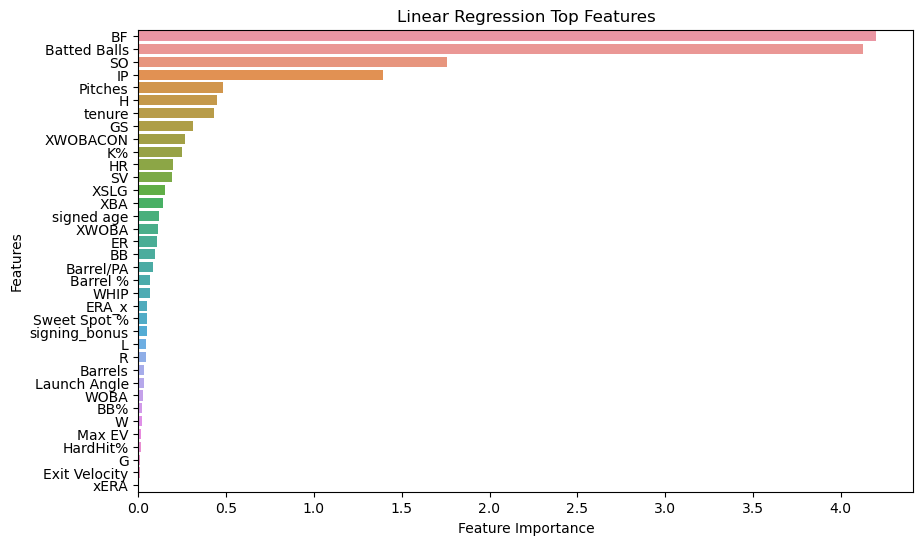

In [27]:
coef_abs = abs(lr_model.coef_)

feature_importance = pd.Series(coef_abs, index=X_train.columns)

sorted_features = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('Linear Regression Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### Ridge

In [28]:
from sklearn.linear_model import Ridge

ridge_steps = [
    ('preprocess', pitch_adv_ct),
    ('model', Ridge(alpha=1))  # <------ Whatever string you assign here will be used later
]

ridge_pipeline = Pipeline(ridge_steps)
ridge_pipeline.fit(X_train, log_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA'],
      dtype='object'))])),
                ('model', Ridge(alpha=1))])

In [29]:
ridge_model = ridge_pipeline.steps[1][1]

model_results(ridge_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.6711151720728661
Testing RMSE:  0.6746379121480969
Training R^2:  0.585548521119327
Testing R^2:  0.5766185777571635
Cross Validation RMSE:  0.47501553141990477
Cross Validation R^2:  0.5578121777825573


In [30]:
coef_abs = abs(ridge_model.coef_)

feature_importance = pd.Series(coef_abs, index=X_train.columns)

sorted_features = feature_importance.sort_values(ascending=False)
print(sorted_features)

SO               0.483067
tenure           0.431922
Pitches          0.419823
IP               0.320690
GS               0.304965
Batted Balls     0.260423
BF               0.253841
BB               0.218591
K%               0.213439
XWOBACON         0.192106
SV               0.191131
HR               0.174448
XSLG             0.159242
XBA              0.147655
ER               0.137224
signed age       0.116290
H                0.075296
ERA_x            0.055221
BB%              0.054385
WHIP             0.053675
R                0.050646
L                0.048152
Sweet Spot %     0.046069
signing_bonus    0.045048
Barrels          0.026788
Barrel/PA        0.024121
Launch Angle     0.023533
W                0.019468
Max EV           0.017130
HardHit%         0.015903
Barrel %         0.010880
Exit Velocity    0.006528
xERA             0.005660
G                0.005230
WOBA             0.003183
XWOBA            0.000912
dtype: float64


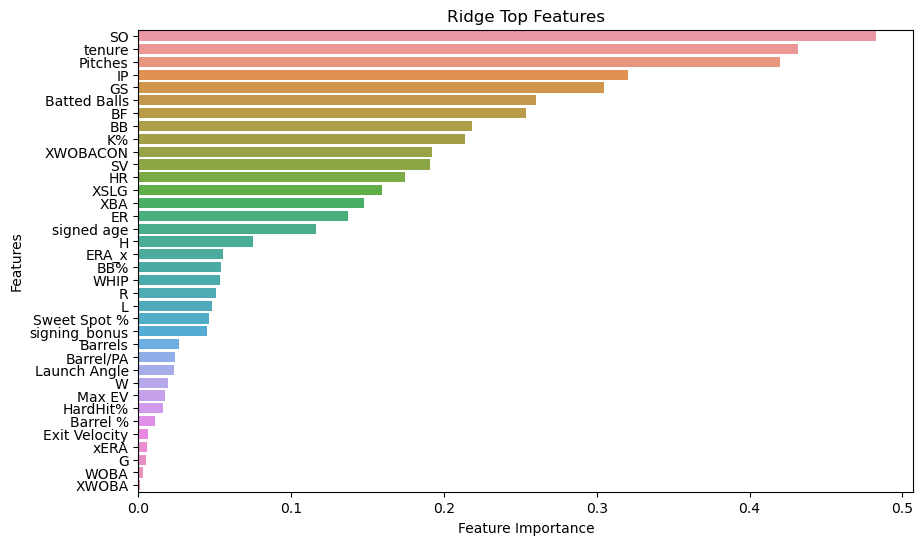

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('Ridge Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### lasso

In [32]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.1)

lasso_pipeline = Pipeline(steps=[
    ('preprocess', pitch_adv_ct),
    ('model', lasso)
])

lasso_pipeline.fit(X_train, log_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA'],
      dtype='object'))])),
                ('model', Lasso(alpha=0.1))])

In [33]:
lasso_model = lasso_pipeline.steps[1][1]

model_results(lasso_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.7153780826004853
Testing RMSE:  0.7035008785027748
Training R^2:  0.5290759828731674
Testing R^2:  0.5396166602081339
Cross Validation RMSE:  0.5165811279690091
Cross Validation R^2:  0.5212321715935524


In [34]:

#尋找重要的特徵
selected_features_index = lasso_model.coef_ != 0
selected_features = X_train.columns[selected_features_index]

# 輸出選擇的特徵
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['tenure', 'SV', 'SO'], dtype='object')


### SVR

In [35]:
from sklearn import svm
from sklearn.svm import LinearSVR
svm_steps = [('preprocess', pitch_adv_ct), ('model', svm.SVR())]
svm_pipeline = Pipeline(svm_steps)

svm_grid = {
            'model__kernel': ['rbf'], #高斯轉換
            'model__C': [0.1, 1, 10],
            'model__degree': [1,4]
           }  

svm_model = GridSearchCV(estimator = svm_pipeline,
                         param_grid = svm_grid,
                         scoring = 'r2') #用r2找最好的


svm_model.fit(X_train, log_y_train)
display(svm_model.best_params_)
print("Best CV Score:", round(svm_model.best_score_,5))

{'model__C': 1, 'model__degree': 1, 'model__kernel': 'rbf'}

Best CV Score: 0.65225


In [36]:
best_model = svm_model.best_estimator_
svm_model = best_model.steps[1][1] 

model_results(svm_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.5248926904437732
Testing RMSE:  0.6155446655822676
Training R^2:  0.7464750946746863
Testing R^2:  0.6475403100010174
Cross Validation RMSE:  0.37028797845826833
Cross Validation R^2:  0.6550769076291806


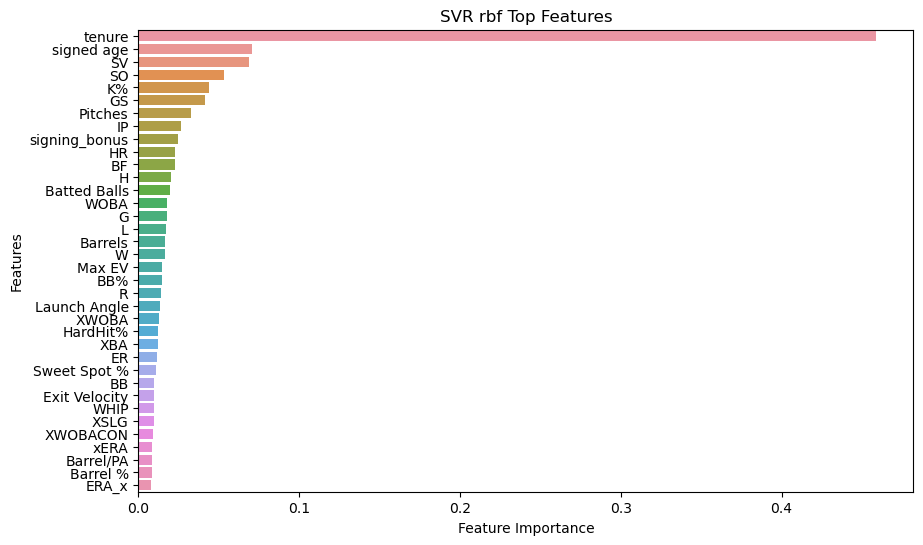

In [37]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, pp_X_train, log_y_train, n_repeats=10, random_state=42)
feature_importance = result.importances_mean

feature_importance_series = pd.Series(feature_importance, index=X_train.columns)
sorted_features = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('SVR rbf Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [38]:
from sklearn import svm
from sklearn.svm import LinearSVR
svm_steps = [('preprocess', pitch_adv_ct), ('model', svm.SVR())]
svm_pipeline = Pipeline(svm_steps)

svm_grid = {
            'model__kernel': ['poly'], # poly
            'model__C': [0.1, 1, 10],
            'model__degree': [1, 4]
           }  

svm_model = GridSearchCV(estimator = svm_pipeline,
                         param_grid = svm_grid,
                         scoring = 'r2') #用r2找最好的


svm_model.fit(X_train, log_y_train)
display(svm_model.best_params_)
print("Best CV Score:", round(svm_model.best_score_,5)) 

{'model__C': 1, 'model__degree': 1, 'model__kernel': 'poly'}

Best CV Score: 0.56045


In [39]:
best_model = svm_model.best_estimator_
svm_model = best_model.steps[1][1] 

model_results(svm_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.6785755743220528
Testing RMSE:  0.6881529035278668
Training R^2:  0.576282866790354
Testing R^2:  0.5594855040988425
Cross Validation RMSE:  0.4718894388974172
Cross Validation R^2:  0.5608477147085633


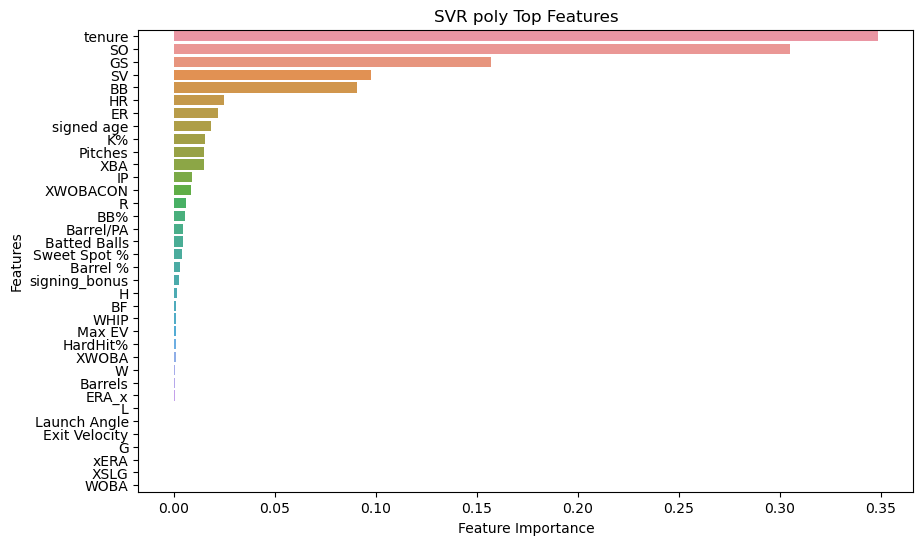

In [40]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, pp_X_train, log_y_train, n_repeats=10, random_state=42)
feature_importance = result.importances_mean

feature_importance_series = pd.Series(feature_importance, index=X_train.columns)
sorted_features = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('SVR poly Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### Gradient Boosting Regressor

In [41]:
#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
ensemble_steps = [('preprocess', pitch_adv_ct), 
                  ('model', GradientBoostingRegressor(random_state = 42))]

ensemble_pipeline = Pipeline(ensemble_steps)

ensemble_grid = {
                'model__learning_rate': [0.1], #學習率
                'model__n_estimators': [50], #迭代次數
                'model__max_depth': [5], #深度
                'model__max_features': [15, 30] #變數數量
               }  

ensemble_model = GridSearchCV(estimator = ensemble_pipeline,
                         param_grid = ensemble_grid,
                         scoring = 'r2')

ensemble_model.fit(X_train, log_y_train)
display(ensemble_model.best_params_)
print("Best CV Score:", round(ensemble_model.best_score_,5))

{'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__max_features': 15,
 'model__n_estimators': 50}

Best CV Score: 0.69159


In [42]:
best_model = ensemble_model.best_estimator_
ensemble_model = best_model.steps[1][1]  

model_results(ensemble_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.3234449746116992
Testing RMSE:  0.550584792598289
Training R^2:  0.9037323445059693
Testing R^2:  0.7180067359061857
Cross Validation RMSE:  0.32594485886629154
Cross Validation R^2:  0.6980025261207676


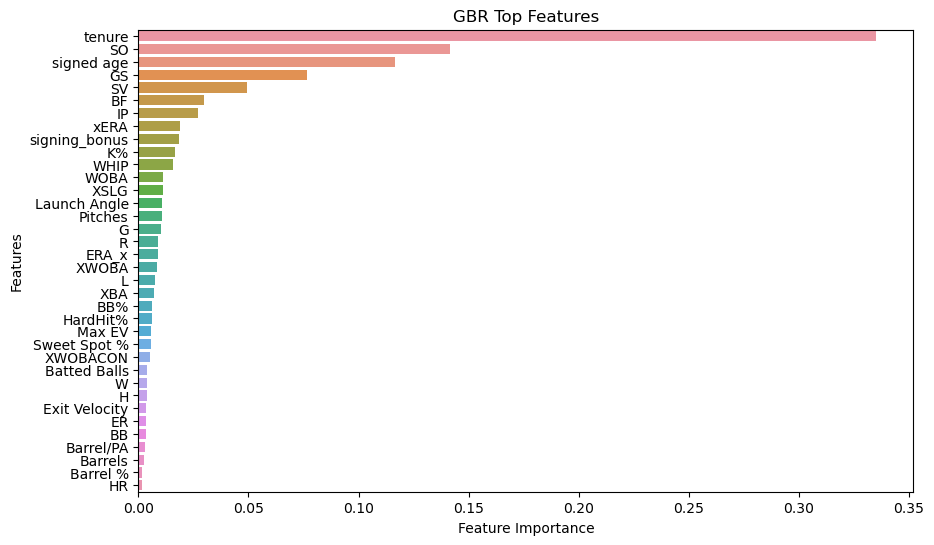

In [43]:
feature_importance = ensemble_model.feature_importances_
feature_importance = pd.Series(feature_importance, index=X_train.columns)
sorted_features = feature_importance.sort_values(ascending=False)

# 繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('GBR Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### 隨機森林

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr_steps = [('preprocess', pitch_adv_ct), 
            ('model', RandomForestRegressor(random_state = 42))]

rfr_pipeline = Pipeline(rfr_steps)

rfr_grid = {'model__n_estimators': [120], #120tree
            'model__max_depth': [3, 10], #depth
            'model__max_features': [30]}  

rfr_model = GridSearchCV(estimator = rfr_pipeline,
                           param_grid = rfr_grid,
                           scoring = 'r2')

rfr_model.fit(X_train, log_y_train)
rfr_model.best_params_
display(rfr_model.best_params_)
print("Best CV Score:", round(rfr_model.best_score_,5))

{'model__max_depth': 10, 'model__max_features': 30, 'model__n_estimators': 120}

Best CV Score: 0.68338


In [45]:

best_model = rfr_model.best_estimator_
rfr_model = best_model.steps[1][1]  

model_results(rfr_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.2833919847149453
Testing RMSE:  0.5646987881187826
Training R^2:  0.9260982530157674
Testing R^2:  0.7033638865401195
Cross Validation RMSE:  0.33269831486078943
Cross Validation R^2:  0.691215284495813


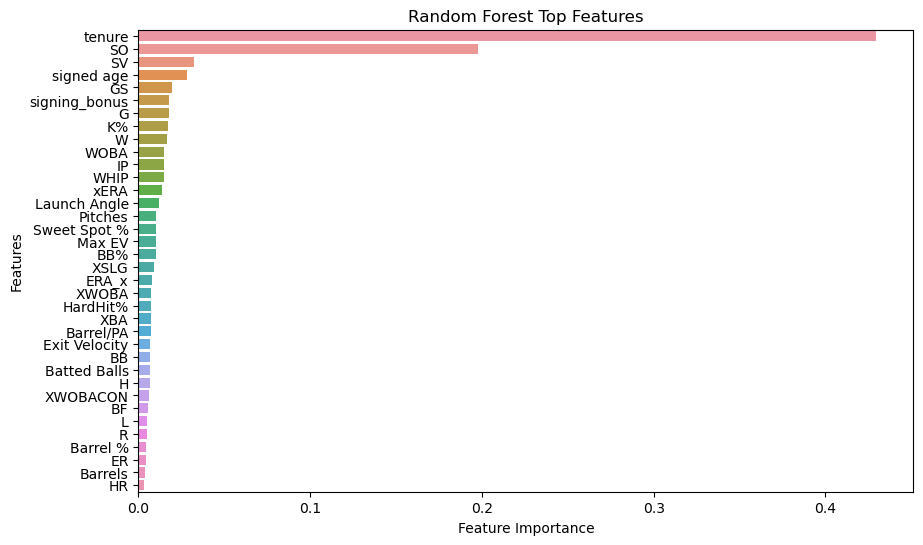

In [46]:
feature_importance = rfr_model.feature_importances_
feature_importance = pd.Series(feature_importance, index=X_train.columns)
sorted_features = feature_importance.sort_values(ascending=False)

# 繪製長條圖
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index)
plt.title('Random Forest Top Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### xgb

In [47]:
import xgboost as xgb
from xgboost import XGBRegressor

#XGboost

xgb_steps = [('preprocess', pitch_adv_ct), 
            ('model', XGBRegressor())]

xgb_pipeline = Pipeline(xgb_steps)

xgb_grid = {'model__n_estimators': [100, 120, 130],
            'model__max_depth': [4, 5, 10],
            'model__learning_rate': [0.1]}  

xgb_model = GridSearchCV(estimator = xgb_pipeline,
                           param_grid = xgb_grid,
                           scoring = 'r2')

xgb_model.fit(X_train, log_y_train)
display(xgb_model.best_params_)
print("Best CV Score:", round(xgb_model.best_score_,5))

{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 100}

Best CV Score: 0.68874


In [48]:

best_model = xgb_model.best_estimator_
xgb_model = best_model.steps[1][1]  

model_results(xgb_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

Training RMSE:  0.36177242676312826
Testing RMSE:  0.5620648992527987
Training R^2:  0.8795656132235756
Testing R^2:  0.7061245953409752
Cross Validation RMSE:  0.32730090487851754
Cross Validation R^2:  0.6965526507678215


In [49]:
test_sizes = [0.1, 0.2, 0.3, 0.4]  # 不同的測試資料集比例

for test_size in test_sizes:
    # 將資料集分為訓練集和測試集
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=test_size, random_state=42)

    log_y_train1 = np.log(y_train1)
    log_y_test1 = np.log(y_test1)
    pp_X_train1 = pd.DataFrame(pitch_adv_ct.fit_transform(X_train1))
    pp_X_test1 = pd.DataFrame(pitch_adv_ct.fit_transform(X_test1))

    xgb_steps = [('preprocess', pitch_adv_ct), 
            ('model', XGBRegressor())]

    xgb_pipeline = Pipeline(xgb_steps)

    xgb_grid = {'model__n_estimators': [100, 120, 130],
                'model__max_depth': [4, 5, 10],
                'model__learning_rate': [0.1]}  

    xgb_model_1 = GridSearchCV(estimator = xgb_pipeline,
                              param_grid = xgb_grid,
                             scoring = 'r2')

    xgb_model_1.fit(X_train1, log_y_train1)
    display(xgb_model_1.best_params_)
    print("Best CV Score:", round(xgb_model_1.best_score_,5))
    
    best_model = xgb_model_1.best_estimator_
    xgb_model_1 = best_model.steps[1][1]  

    model_results(xgb_model_1, pp_X_train1, log_y_train1, pp_X_test1, log_y_test1)


    
    

{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 100}

Best CV Score: 0.68874
Training RMSE:  0.36177242676312826
Testing RMSE:  0.5588509273602417
Training R^2:  0.8795656132235756
Testing R^2:  0.709475834225124
Cross Validation RMSE:  0.32730090487851754
Cross Validation R^2:  0.6965526507678215


{'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 100}

Best CV Score: 0.67417
Training RMSE:  0.28191532472816994
Testing RMSE:  0.560674854535287
Training R^2:  0.9274590609724287
Testing R^2:  0.7008116067490822
Cross Validation RMSE:  0.3468556299606351
Cross Validation R^2:  0.6771766034292851


{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 100}

Best CV Score: 0.67216
Training RMSE:  0.34264637353462
Testing RMSE:  0.5486906580260337
Training R^2:  0.8959332520487109
Testing R^2:  0.6946806916401648
Cross Validation RMSE:  0.3574577663173295
Cross Validation R^2:  0.6790846819369805


{'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 120}

Best CV Score: 0.65033
Training RMSE:  0.21653052669530046
Testing RMSE:  0.5528126436090353
Training R^2:  0.9577457872803373
Testing R^2:  0.7095193044024359
Cross Validation RMSE:  0.37149633470504534
Cross Validation R^2:  0.6604113726444608


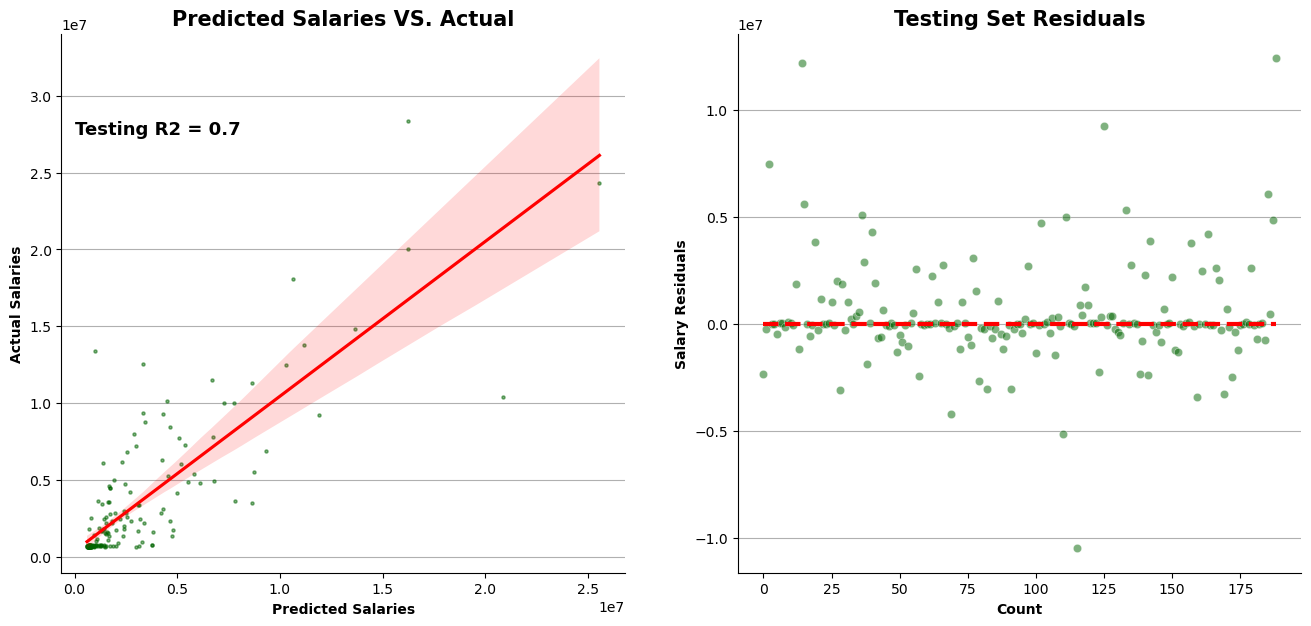

In [50]:
#視覺畫這些模型 

y_pred_test = xgb_model.predict(pp_X_test) #這裡可以丟任何一個模型
resid = y_test - np.exp(y_pred_test) #找殘差

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.regplot(ax = axes[0], 
            x = np.exp(y_pred_test), 
            y = y_test,
            scatter_kws={'s':5, 'alpha': 0.5, 'color': 'darkgreen'},
            line_kws={"color": "red"})

axes[0].text(50, 2.75e7, "Testing R2 = 0.7", 
             horizontalalignment='left', fontsize=13, color='black', weight = 'bold')

axes[0].set_xlabel('Predicted Salaries', weight = 'bold') 
axes[0].set_ylabel('Actual Salaries', weight = 'bold') 
axes[0].set_title('Predicted Salaries VS. Actual', weight = 'bold', fontdict = {'fontsize' : 15})

sns.scatterplot(ax = axes[1], 
                x = range(y_test.shape[0]),
                y = resid, 
                alpha=0.5,
                color= "darkgreen")
sns.lineplot(ax = axes[1], 
             x=range(y_test.shape[0]), y = 0, 
             color='red', linestyle="dashed", linewidth = 3)

axes[1].set_xlabel('Count', weight = 'bold') 
axes[1].set_ylabel('Salary Residuals', weight = 'bold') 
axes[1].set_title('Testing Set Residuals', weight = 'bold', fontdict = {'fontsize' : 15})

sns.despine(right = True)

axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True)
axes[0].xaxis.grid(False)
axes[1].set_axisbelow(True)
axes[1].yaxis.grid(True)
axes[1].xaxis.grid(False)

plt.show()

In [51]:
# get feature weights
best_model_coef = xgb_model.feature_importances_
best_model_coef

feat_imp_series = pd.Series(best_model_coef, index = pp_X_train.columns)

top_features = X_train.columns.tolist()
top_features_list = list(top_features)

best_model_coef = xgb_model.feature_importances_
best_model_coef

feat_imp_series = pd.Series(best_model_coef, 
                            index = pp_X_train.columns)
top_features_df = pd.DataFrame(top_features)

feat_imp_df = pd.DataFrame(feat_imp_series)


merged = pd.merge(top_features_df, feat_imp_df, left_index=True, right_index=True)

merged = merged.rename(columns = {'0_x': 'Feature', '0_y': 'Importance'})

sorted_features = merged.sort_values('Importance', ascending = False)

sorted_features



,Feature,Importance
1,tenure,0.245318
16,SO,0.123137
35,xERA,0.067915
17,WHIP,0.051530
9,SV,0.037007
18,Pitches,0.032726
8,GS,0.032590
33,K%,0.025694
29,WOBA,0.025256
34,BB%,0.020388


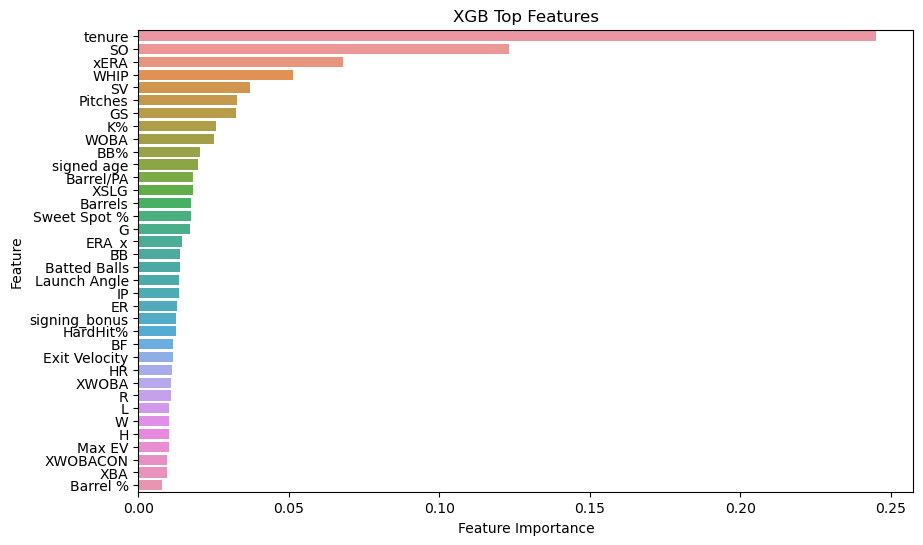

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGB Top Features')
plt.show()

## present

In [53]:
import tkinter as tk
import math


stat = []
stat_nor = []

keyin =0

def process_input():
    # 在這裡處理輸入並執行適當的邏輯

    # 範例：取得使用者輸入的文字
    
    stat.append(eval(entry.get()))

    user_input = entry.get()
    
    # 所有待輸入數據
    all_data = ['signing_bonus', 'tenure', 'signed age', 'BF', 'W', 'L', 'ERA_x', 'G',
       'GS', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'WHIP', 'Pitches',
       'Batted Balls', 'Barrels', 'Barrel %', 'Barrel/PA', 'Exit Velocity',
       'Max EV', 'Launch Angle', 'Sweet Spot %', 'XBA', 'XSLG', 'WOBA',
       'XWOBA', 'XWOBACON', 'HardHit%', 'K%', 'BB%', 'xERA',"","","","","","","",""]
    global keyin
    keyin += 1
    # 在這裡處理輸出並顯示在視窗上
    
    
    
    if keyin <36:
        output_text = "您已輸入["+ all_data[keyin-1] + "] : "+ user_input + "\n請接著輸入[" + all_data[keyin] + "]"
        output_label.config(text=output_text)
    elif keyin == 36:
        output_text = "您已輸入["+ all_data[keyin-1] + "] : "+ user_input +"\n已完成數據輸入，可開始評估 "
        output_label.config(text=output_text,font=("Arial",10), fg = "red")
    elif keyin > 36:
        output_text = "您已輸入完成，可開始評估 "
        output_label.config(text=output_text,font=("Arial",10), fg = "red")

    




def estimate():
    

    
    #new_data_predictions = tan(stat) 
    if len(stat) < 36:
        # 在這裡處理輸出並顯示在視窗上
        output_text = "數據不足，無法估計"
        output_label_2.config(text=output_text)
    elif len(stat) == 36:
        
        new_data_predictions = xgb_model.predict(np.array([stat]) )
        answer = math.exp(new_data_predictions)
    
        # 在這裡處理輸出並顯示在視窗上
        output_text = "合理薪資：" + str(answer)
        output_label_2.config(text=output_text)
    elif len(stat) > 36:
        stat_new = stat[:36]
        new_data_predictions = xgb_model.predict(np.array([stat_new]) )
        answer = math.exp(new_data_predictions)
        # 在這裡處理輸出並顯示在視窗上
        output_text = "數據過量，將只取前36項作估計\n合理薪資：" + str(answer)
        output_label_2.config(text=output_text)


# 建立主視窗
window = tk.Tk()
window.title('salary estimator')

window.iconbitmap("Baseball_Ball.ico")
window.geometry('380x400')
# 建立輸入框
entry = tk.Entry(window)
entry.place(x = 190,y = 200,anchor = "center")

# 建立按鈕

button = tk.Button(window, text="輸入數據", command=process_input)
button.place(x = 190,y = 230,anchor = "center")

# 建立輸出標籤
output_label = tk.Label(window)
output_label.place(x = 190,y = 255,anchor = "center")


# 建立按鈕2
button2 = tk.Button(window, text="進行預估",bg='#FFFF00', font=("Arial", 15) ,command=estimate)
button2.place(x = 190,y = 80,anchor = "center")

# 建立輸出標籤2
output_label_2 = tk.Label(window, font=("Arial", 15))
output_label_2.place(x = 190,y = 132,anchor = "center")

# 啟動視窗主迴圈
window.mainloop()

# --------------檢查輸入用
print(stat)
print(len(stat))

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
37


In [54]:
print(math.exp(xgb_model.predict(np.array([[3300000,7,28,744.0,12.0,7.0,3.31,29.0,29.0,0.0,182.1,150.0,69.0,67.0,14.0,55.0,179.0,1.12,2884,501,24,4.8,3.2,86.1,112.9,11.3,32.9,0.219,0.334,0.272,0.278,0.326,27.1,24.1,7.4,3.23]]))))

3155633.2443427006
